NOW I WILL COMPARE THE AQI VALUE WHICH SHOWS THE AİR POLLUTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


For the T test we can understand that we reject H0 which are 
H₀ (null hypothesis): There is no difference in PM2.5 levels between India and Canada.

H₁ (alternative hypothesis): There is a difference in PM2.5 levels between India and Canada.
as we can see from T test and from histogram and boxplot we can clearyl see the huge dıfference in air pollution 


In [ ]:
import pandas as pd

# 1. read
can_mort = pd.read_csv("Canada_Disease_Mortality_Data_(1990-2020).csv")
ind_mort = pd.read_csv("india_disease_mortality_data_1990_2022.csv")

can_tob = pd.read_csv("Canada_Tobacco_Use_1990-2022.csv")
ind_tob = pd.read_csv("India_Tobacco_Use_1990-2022.csv")

can_air = pd.read_csv("Canada_Air_Pollution_1990-2022.csv")
ind_air = pd.read_csv("India_Air_Pollution_1990-2022.csv")

can_water = pd.read_csv("Canada_Water_Pollution_1990-2022.csv")
ind_water = pd.read_csv("India_Water_Pollution_1990-2022.csv")

can_health = pd.read_csv("Canada_Health_Data__1990-2022_.csv")
ind_health = pd.read_csv("India_Health_Data__1990-2022_.csv")

can_pop = pd.read_csv("Extended_Canada_Population_Data__1990-2022_.csv")
ind_pop = pd.read_csv("Extended_India_Population_Data__1990-2022_.csv")

# 2.sleect lung cancer
can_mort = can_mort[["Year", "Trachea, Bronchus, Lung Cancers"]]
ind_mort = ind_mort[["Year", "Trachea, bronchus, lung cancers"]]

# 3. change the name
can_mort.rename(columns={"Trachea, Bronchus, Lung Cancers": "Lung Cancer Mortality"}, inplace=True)
ind_mort.rename(columns={"Trachea, bronchus, lung cancers": "Lung Cancer Mortality"}, inplace=True)

# 4. name of the countyr
can_mort["Country"] = "Canada"
ind_mort["Country"] = "India"

can_tob["Country"] = "Canada"
ind_tob["Country"] = "India"

can_air["Country"] = "Canada"
ind_air["Country"] = "India"

can_water["Country"] = "Canada"
ind_water["Country"] = "India"

can_health["Country"] = "Canada"
ind_health["Country"] = "India"

can_pop["Country"] = "Canada"
ind_pop["Country"] = "India"

# 5.
mortality = pd.concat([can_mort, ind_mort], ignore_index=True)
tobacco = pd.concat([can_tob, ind_tob], ignore_index=True)
air = pd.concat([can_air, ind_air], ignore_index=True)
water = pd.concat([can_water, ind_water], ignore_index=True)
health = pd.concat([can_health, ind_health], ignore_index=True)
population = pd.concat([can_pop, ind_pop], ignore_index=True)

# 6. 
combined = mortality.merge(tobacco, on=["Year", "Country"], how="left")
combined = combined.merge(air, on=["Year", "Country"], how="left")
combined = combined.merge(water, on=["Year", "Country"], how="left")
combined = combined.merge(health, on=["Year", "Country"], how="left")
combined = combined.merge(population, on=["Year", "Country"], how="left")

# 7.new csv
combined.to_csv("final_clean_combined_dataset.csv", index=False)




🎯 'final_clean_combined_dataset.csv' başarıyla Lung Cancer Mortality ile oluşturuldu!


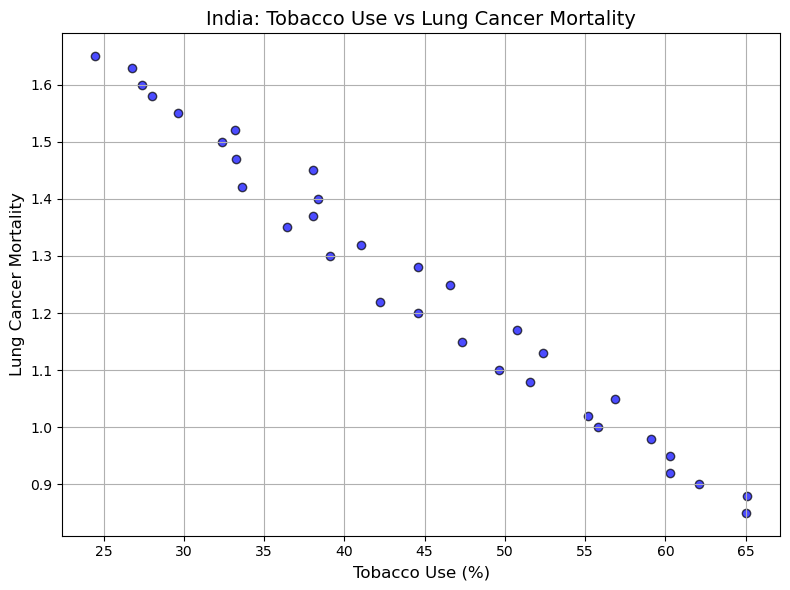

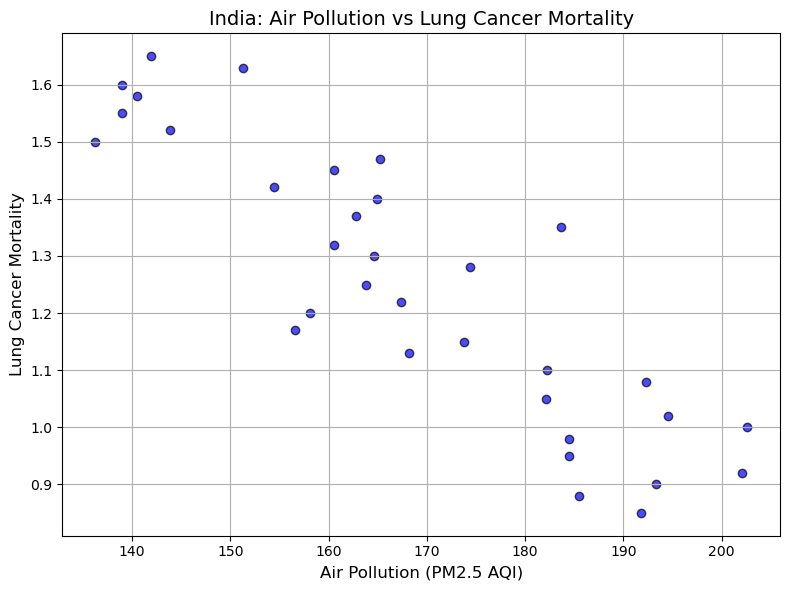

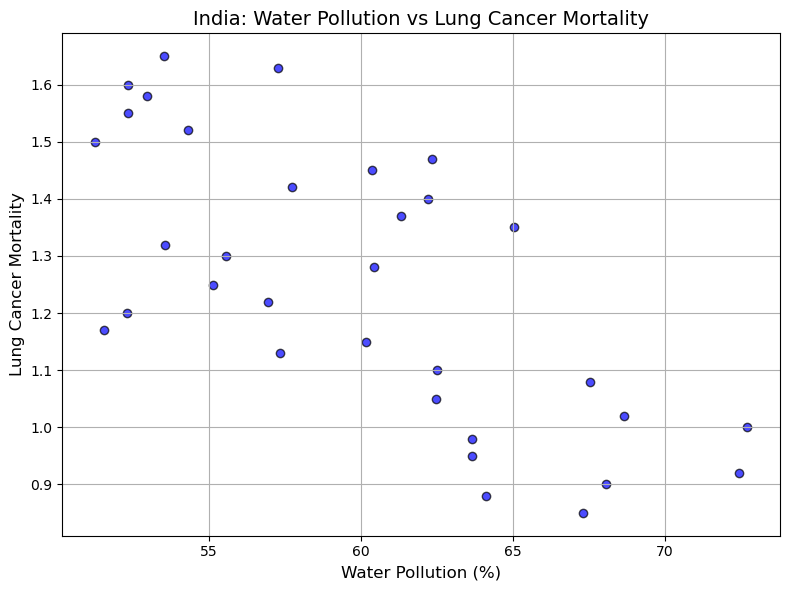

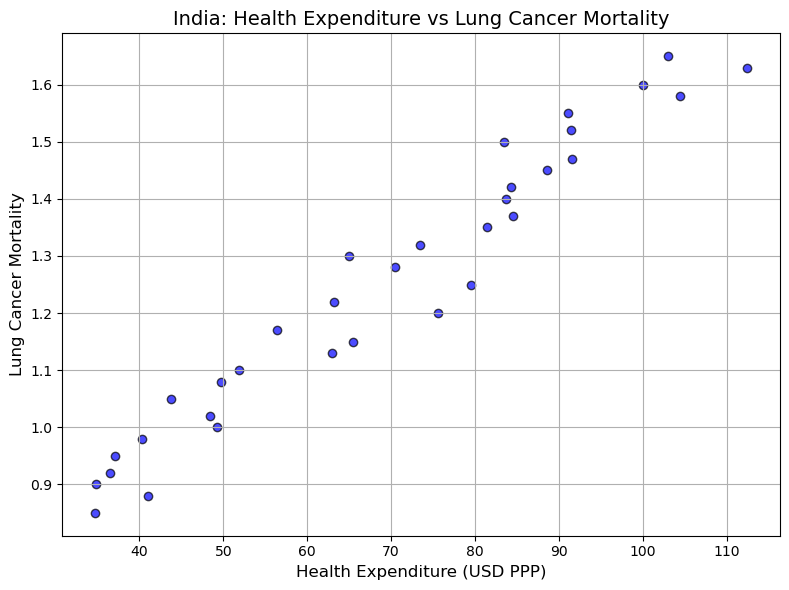

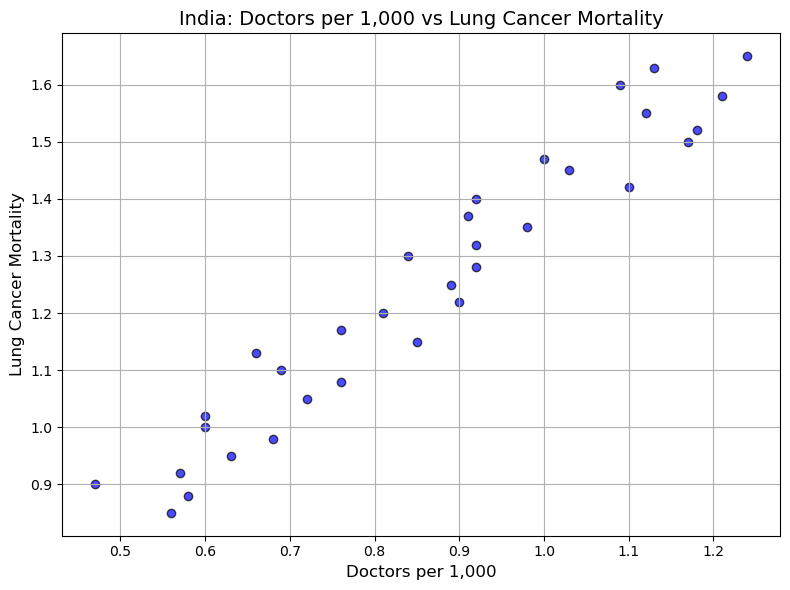

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv("final_clean_combined_dataset.csv")

# Sadece India verisi
india = df[df['Country'] == 'India']

# Scatter plot fonksiyonu
def scatter_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.scatter(india[x], india[y], alpha=0.7, color='blue', edgecolors='black')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Scatter plotları çiz
scatter_plot('Final Estimate (Tobacco Use)', 'Lung Cancer Mortality',
             'India: Tobacco Use vs Lung Cancer Mortality',
             'Tobacco Use (%)', 'Lung Cancer Mortality')

scatter_plot('Air Pollution', 'Lung Cancer Mortality',
             'India: Air Pollution vs Lung Cancer Mortality',
             'Air Pollution (PM2.5 AQI)', 'Lung Cancer Mortality')

scatter_plot('Water Pollution', 'Lung Cancer Mortality',
             'India: Water Pollution vs Lung Cancer Mortality',
             'Water Pollution (%)', 'Lung Cancer Mortality')

scatter_plot('Health Expenditure Per Capita (USD PPP)', 'Lung Cancer Mortality',
             'India: Health Expenditure vs Lung Cancer Mortality',
             'Health Expenditure (USD PPP)', 'Lung Cancer Mortality')

scatter_plot('Doctors per 1,000', 'Lung Cancer Mortality',
             'India: Doctors per 1,000 vs Lung Cancer Mortality',
             'Doctors per 1,000', 'Lung Cancer Mortality')


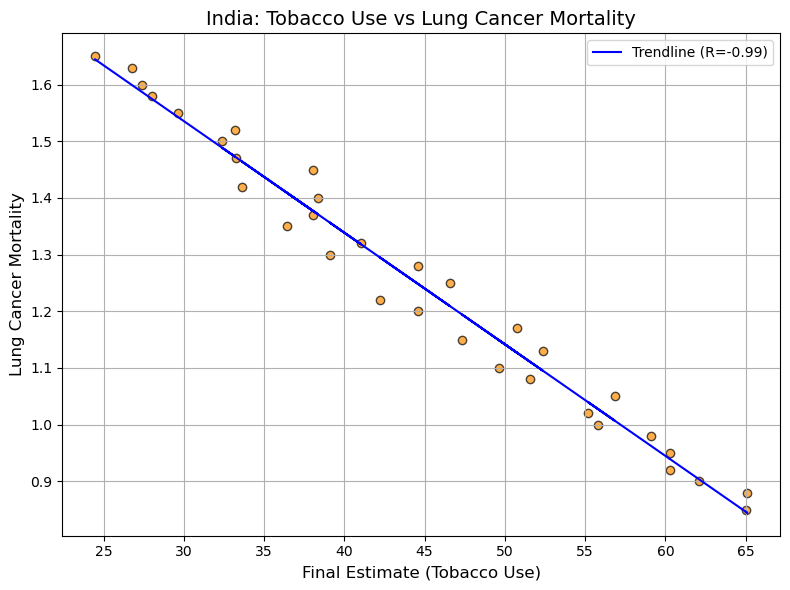

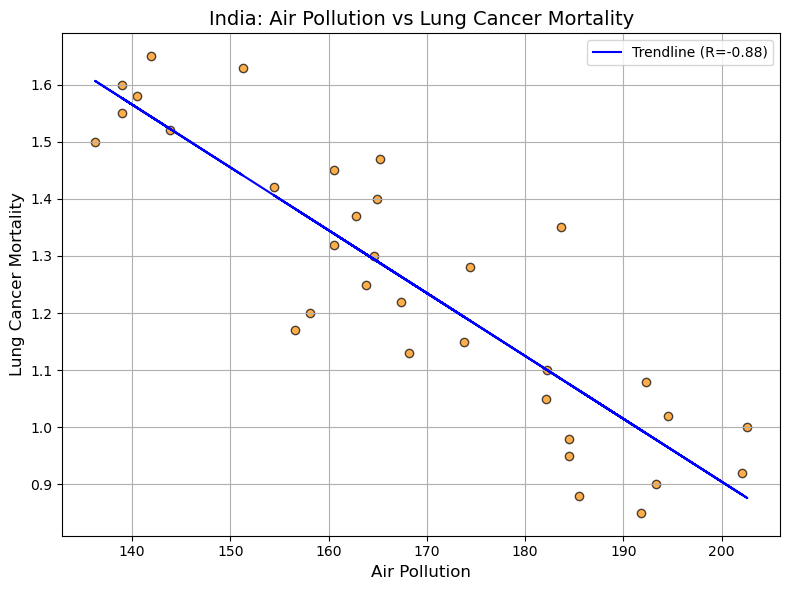

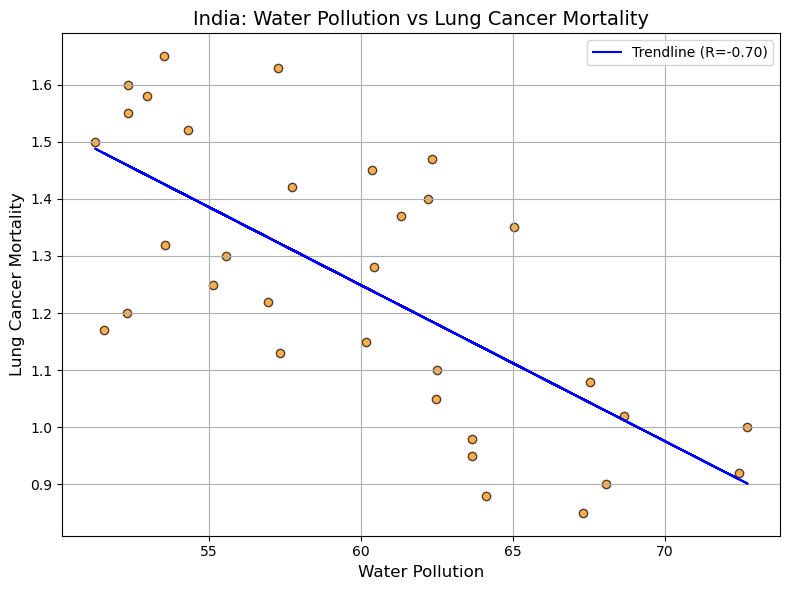

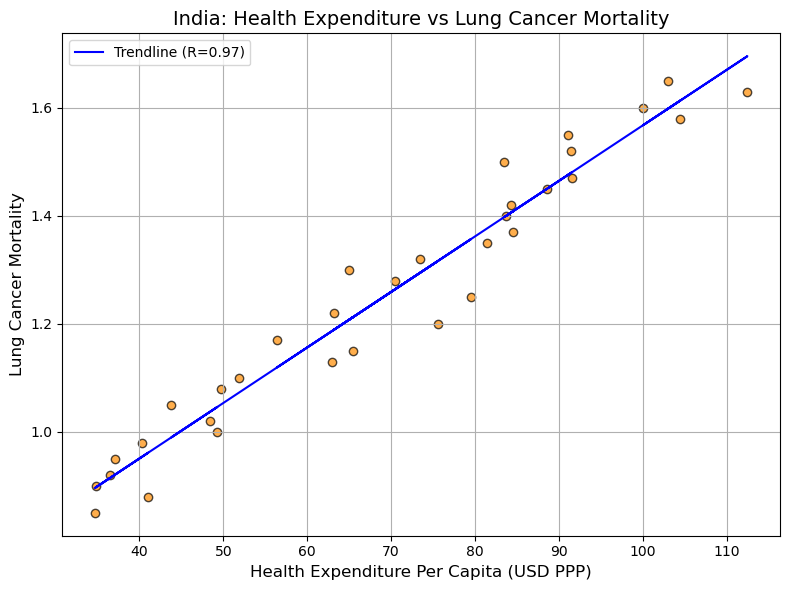

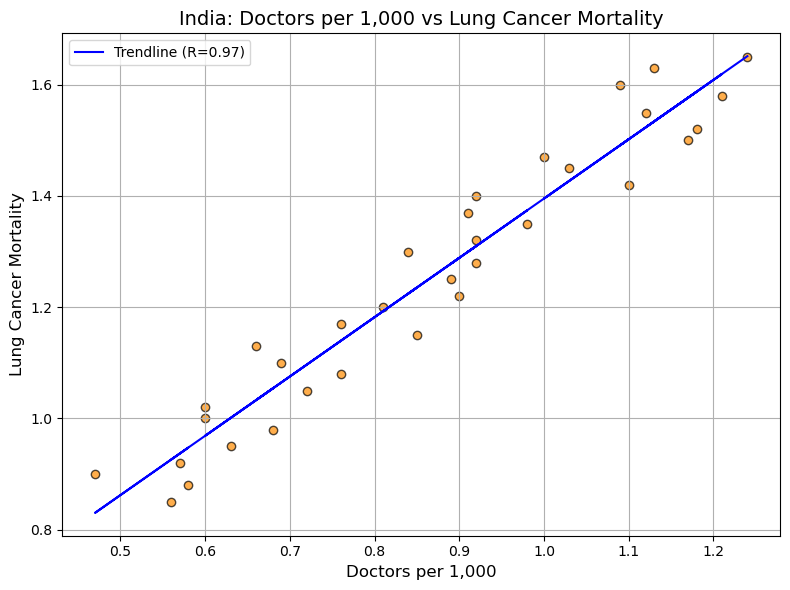

In [28]:
# Scatter plot with trendline function
def scatter_with_trendline(x_col, y_col, title):
    plt.figure(figsize=(8,6))
    x = india[x_col]
    y = india[y_col]
    plt.scatter(x, y, alpha=0.7, color='darkorange', edgecolors='black')
    
    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(x.dropna(), y.dropna())
    plt.plot(x, intercept + slope*x, color='blue', label=f"Trendline (R={r_value:.2f})")
    
    plt.title(title, fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create scatter plots with trendlines
scatter_with_trendline('Final Estimate (Tobacco Use)', 'Lung Cancer Mortality', 'India: Tobacco Use vs Lung Cancer Mortality')
scatter_with_trendline('Air Pollution', 'Lung Cancer Mortality', 'India: Air Pollution vs Lung Cancer Mortality')
scatter_with_trendline('Water Pollution', 'Lung Cancer Mortality', 'India: Water Pollution vs Lung Cancer Mortality')
scatter_with_trendline('Health Expenditure Per Capita (USD PPP)', 'Lung Cancer Mortality', 'India: Health Expenditure vs Lung Cancer Mortality')
scatter_with_trendline('Doctors per 1,000', 'Lung Cancer Mortality', 'India: Doctors per 1,000 vs Lung Cancer Mortality')

In [27]:
from scipy.stats import spearmanr

# Function to calculate correlation, p-value, and print hypotheses
def correlation_test(x, y, variable_name):
    print(f"\n🔵 Testing: {variable_name} vs Lung Cancer Mortality")
    print(f"H0 (Null Hypothesis): There is no significant relationship between {variable_name} and Lung Cancer Mortality.")
    print(f"HA (Alternative Hypothesis): There is a significant relationship between {variable_name} and Lung Cancer Mortality.\n")
    
    rho, pval = spearmanr(india[x], india[y], nan_policy='omit')
    print(f"Spearman Correlation (ρ) = {rho:.3f}")
    print(f"p-value = {pval:.4f}")
    
    if pval < 0.05:
        print(f"✅ Result: Null Hypothesis rejected (significant relationship detected)\n")
    else:
        print(f"❌ Result: Failed to reject Null Hypothesis (no significant relationship)\n")

# Now test all variables:

# 1. Tobacco Use vs Lung Cancer Mortality
correlation_test('Final Estimate (Tobacco Use)', 'Lung Cancer Mortality', 'Tobacco Use')

# 2. Air Pollution vs Lung Cancer Mortality
correlation_test('Air Pollution', 'Lung Cancer Mortality', 'Air Pollution')

# 3. Water Pollution vs Lung Cancer Mortality
correlation_test('Water Pollution', 'Lung Cancer Mortality', 'Water Pollution')

# 4. Health Expenditure vs Lung Cancer Mortality
correlation_test('Health Expenditure Per Capita (USD PPP)', 'Lung Cancer Mortality', 'Health Expenditure')

# 5. Doctors per 1,000 vs Lung Cancer Mortality
correlation_test('Doctors per 1,000', 'Lung Cancer Mortality', 'Doctors per 1,000')



🔵 Testing: Tobacco Use vs Lung Cancer Mortality
H0 (Null Hypothesis): There is no significant relationship between Tobacco Use and Lung Cancer Mortality.
HA (Alternative Hypothesis): There is a significant relationship between Tobacco Use and Lung Cancer Mortality.

Spearman Correlation (ρ) = -0.990
p-value = 0.0000
✅ Result: Null Hypothesis rejected (significant relationship detected)


🔵 Testing: Air Pollution vs Lung Cancer Mortality
H0 (Null Hypothesis): There is no significant relationship between Air Pollution and Lung Cancer Mortality.
HA (Alternative Hypothesis): There is a significant relationship between Air Pollution and Lung Cancer Mortality.

Spearman Correlation (ρ) = -0.875
p-value = 0.0000
✅ Result: Null Hypothesis rejected (significant relationship detected)


🔵 Testing: Water Pollution vs Lung Cancer Mortality
H0 (Null Hypothesis): There is no significant relationship between Water Pollution and Lung Cancer Mortality.
HA (Alternative Hypothesis): There is a significa

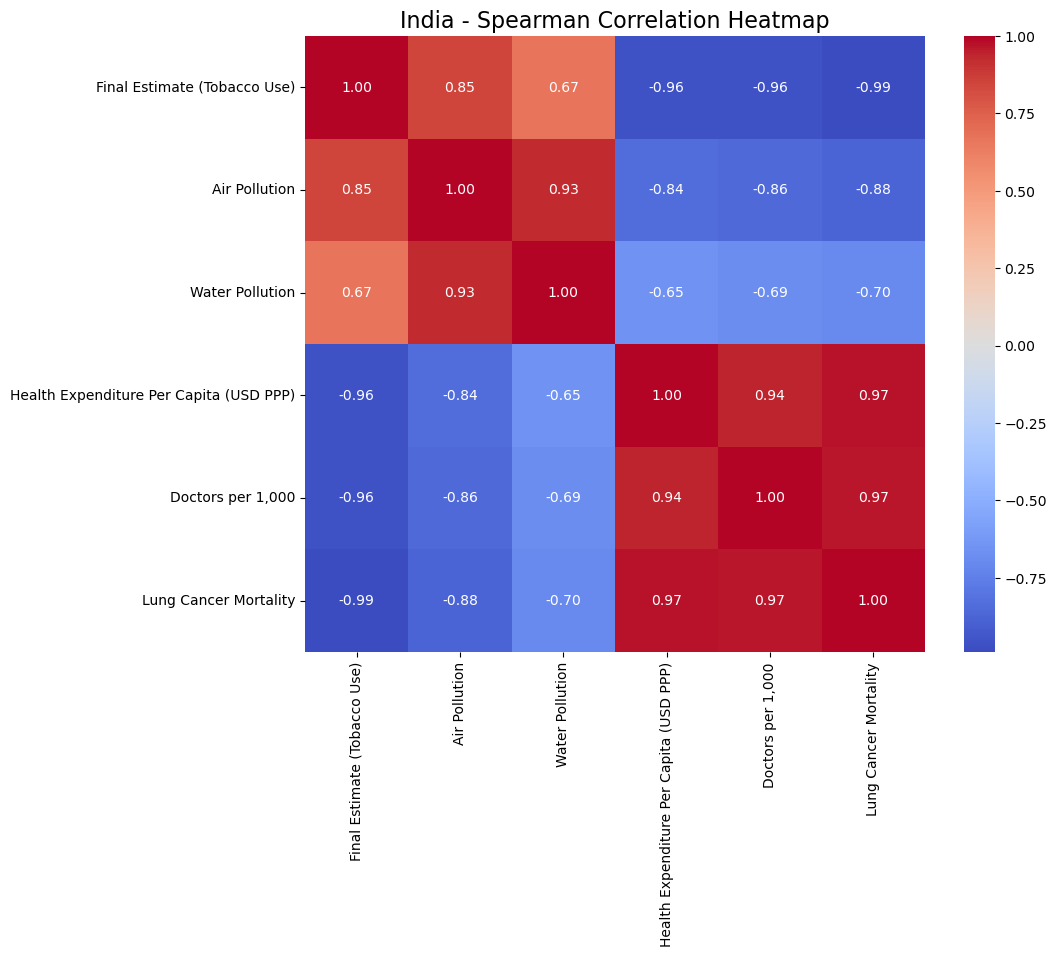

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr, linregress

# Load the updated dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India
india = df[df['Country'] == 'India']

# Select relevant columns
cols_of_interest = [
    'Final Estimate (Tobacco Use)', 
    'Air Pollution', 
    'Water Pollution', 
    'Health Expenditure Per Capita (USD PPP)', 
    'Doctors per 1,000', 
    'Lung Cancer Mortality'
]

# Calculate Spearman Correlation Matrix
corr_matrix = india[cols_of_interest].corr(method='spearman')

# Display correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('India - Spearman Correlation Heatmap', fontsize=16)
plt.show()

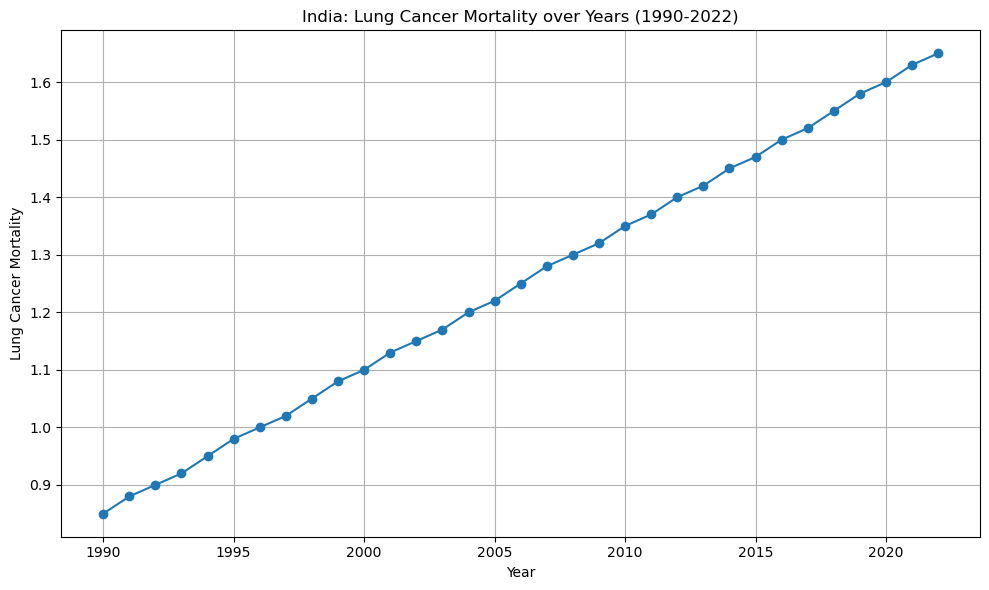

In [29]:
plt.figure(figsize=(10,6))
plt.plot(india['Year'], india['Lung Cancer Mortality'], marker='o', linestyle='-')
plt.title('India: Lung Cancer Mortality over Years (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Mortality')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd
from scipy.stats import spearmanr

# Define a function to get Spearman correlation and p-value
def get_correlation(x, y):
    rho, pval = spearmanr(india[x], india[y], nan_policy='omit')
    return rho, pval

# List of variables we want to test
variables = [
    ('Final Estimate (Tobacco Use)', 'Tobacco Use'),
    ('Air Pollution', 'Air Pollution'),
    ('Water Pollution', 'Water Pollution'),
    ('Health Expenditure Per Capita (USD PPP)', 'Health Expenditure'),
    ('Doctors per 1,000', 'Doctors per 1,000')
]

# Create empty list to collect results
results = []

# Loop over variables
for var, name in variables:
    rho, pval = get_correlation(var, 'Lung Cancer Mortality')
    decision = "Reject H0 (Significant)" if pval < 0.05 else "Fail to Reject H0 (Not Significant)"
    results.append({
        'Variable': name,
        'Spearman ρ': round(rho, 3),
        'p-value': round(pval, 4),
        'Hypothesis Decision': decision
    })

# Create a DataFrame from results
summary_table = pd.DataFrame(results)

# Show the table
summary_table


,Variable,Spearman ρ,p-value,Hypothesis Decision
0,Tobacco Use,-0.990,0.0,Reject H0 (Significant)
1,Air Pollution,-0.875,0.0,Reject H0 (Significant)
2,Water Pollution,-0.700,0.0,Reject H0 (Significant)
3,Health Expenditure,0.975,0.0,Reject H0 (Significant)
4,"Doctors per 1,000",0.969,0.0,Reject H0 (Significant)


📌 Interpretation
All five variables show statistically significant relationships with lung cancer mortality in India (p < 0.05).

Tobacco Use and Air Pollution have strong negative correlations, suggesting that as these factors increase, lung cancer mortality tends to rise.

Health Expenditure and Doctors per 1,000 exhibit strong positive correlations, implying that as healthcare access improves, mortality rates also increase — which may seem counterintuitive. This could reflect a lag effect or improved diagnosis/reporting in better-funded systems.

Water Pollution also shows a significant negative relationship.



NOW WE NEED TO GO FOR CANADA 

In [38]:
import pandas as pd

# Load the full dataset with all variables
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter only Canada
canada = df[df['Country'] == 'Canada']

# Now you can access health expenditure safely
print(canada[['Lung Cancer Mortality', 'Health Expenditure Per Capita (USD PPP)']].dropna())

    Lung Cancer Mortality  Health Expenditure Per Capita (USD PPP)
0                    1.49                                  3535.15
1                    1.57                                  3443.14
2                    1.65                                  3760.97
3                    1.54                                  3686.46
4                    1.73                                  3672.25
5                    1.49                                  3600.57
6                    1.74                                  3704.21
7                    1.52                                  3746.40
8                    1.66                                  3918.23
9                    1.38                                  3935.41
10                   1.45                                  4041.52
11                   1.54                                  3882.73
12                   1.30                                  3987.19
13                   1.28                                  396

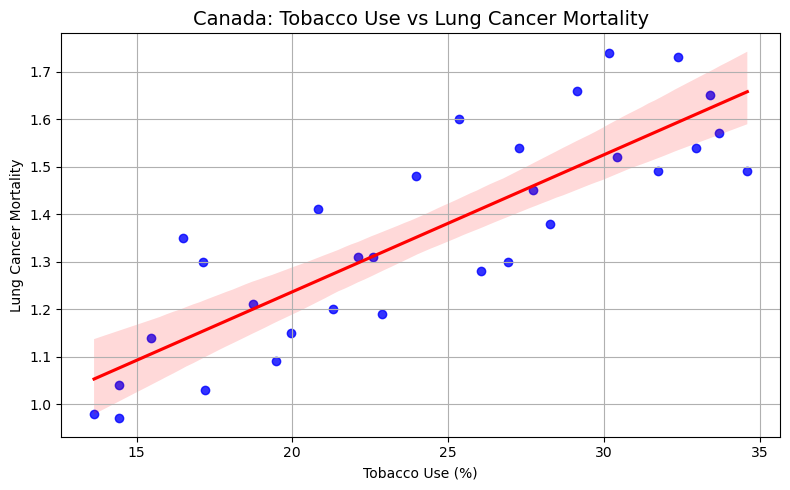

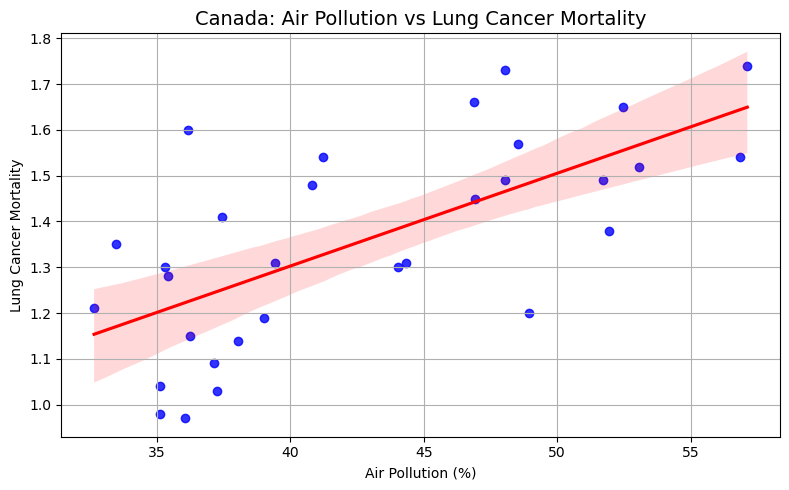

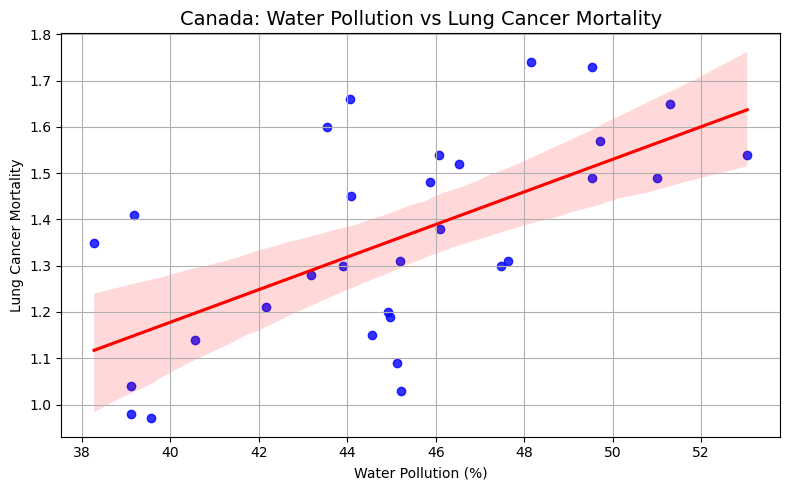

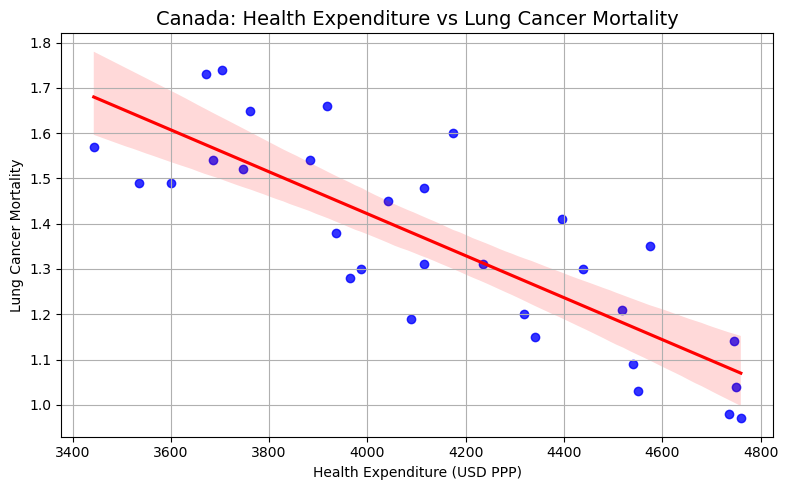

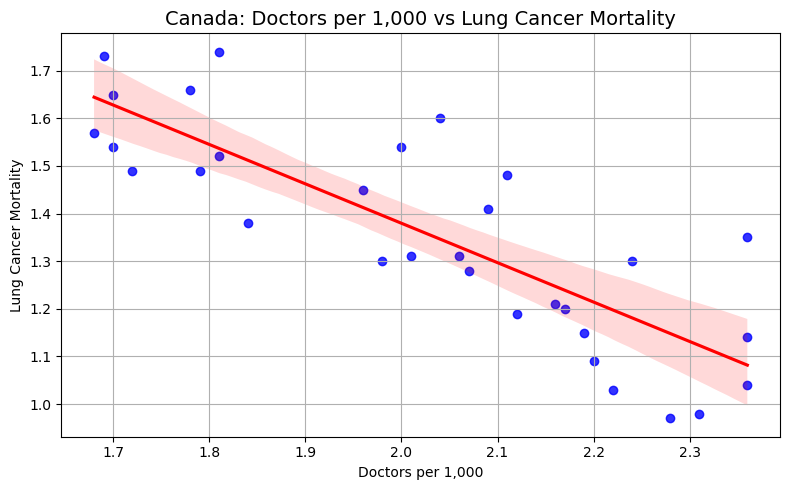

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Canada verisi
canada = df[df['Country'] == 'Canada']

# Plot fonksiyonu
def scatter_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=canada, x=x, y=y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. Tobacco Use vs Lung Cancer Mortality
scatter_plot('Tobacco Use', 'Lung Cancer Mortality',
             'Canada: Tobacco Use vs Lung Cancer Mortality',
             'Tobacco Use (%)', 'Lung Cancer Mortality')

# 2. Air Pollution vs Lung Cancer Mortality
scatter_plot('Air Pollution', 'Lung Cancer Mortality',
             'Canada: Air Pollution vs Lung Cancer Mortality',
             'Air Pollution (%)', 'Lung Cancer Mortality')

# 3. Water Pollution vs Lung Cancer Mortality
scatter_plot('Water Pollution', 'Lung Cancer Mortality',
             'Canada: Water Pollution vs Lung Cancer Mortality',
             'Water Pollution (%)', 'Lung Cancer Mortality')

# 4. Health Expenditure vs Lung Cancer Mortality
scatter_plot('Health Expenditure Per Capita (USD PPP)', 'Lung Cancer Mortality',
             'Canada: Health Expenditure vs Lung Cancer Mortality',
             'Health Expenditure (USD PPP)', 'Lung Cancer Mortality')

# 5. Doctors per 1,000 vs Lung Cancer Mortality
scatter_plot('Doctors per 1,000', 'Lung Cancer Mortality',
             'Canada: Doctors per 1,000 vs Lung Cancer Mortality',
             'Doctors per 1,000', 'Lung Cancer Mortality')


In [51]:
from scipy.stats import spearmanr
import pandas as pd

# Canada verisini filtrele
canada = df[df['Country'] == 'Canada']

# Hipotez test fonksiyonu
def correlation_test(df, x, y, variable_name):
    print(f"\n🔎 Testing: {variable_name}")
    print("H0: There is no relationship between", variable_name, "and Lung Cancer Mortality.")
    print("H1: There is a relationship between", variable_name, "and Lung Cancer Mortality.")
    
    rho, pval = spearmanr(df[x], df[y], nan_policy='omit')
    print(f"Spearman ρ = {rho:.3f}, p-value = {pval:.8f}")
    
    if pval < 0.05:
        print("✅ Reject H0 (Significant relationship detected)")
    else:
        print("❌ Fail to Reject H0 (No significant relationship)")

# Korelasyon testlerini çalıştır
correlation_test(canada, 'Tobacco Use', 'Lung Cancer Mortality', 'Tobacco Use')
correlation_test(canada, 'Air Pollution', 'Lung Cancer Mortality', 'Air Pollution')
correlation_test(canada, 'Water Pollution', 'Lung Cancer Mortality', 'Water Pollution')
correlation_test(canada, 'Health Expenditure Per Capita (USD PPP)', 'Lung Cancer Mortality', 'Health Expenditure')
correlation_test(canada, 'Doctors per 1,000', 'Lung Cancer Mortality', 'Doctors per 1,000')



🔎 Testing: Tobacco Use
H0: There is no relationship between Tobacco Use and Lung Cancer Mortality.
H1: There is a relationship between Tobacco Use and Lung Cancer Mortality.
Spearman ρ = 0.835, p-value = 0.00000001
✅ Reject H0 (Significant relationship detected)

🔎 Testing: Air Pollution
H0: There is no relationship between Air Pollution and Lung Cancer Mortality.
H1: There is a relationship between Air Pollution and Lung Cancer Mortality.
Spearman ρ = 0.659, p-value = 0.00005560
✅ Reject H0 (Significant relationship detected)

🔎 Testing: Water Pollution
H0: There is no relationship between Water Pollution and Lung Cancer Mortality.
H1: There is a relationship between Water Pollution and Lung Cancer Mortality.
Spearman ρ = 0.587, p-value = 0.00052195
✅ Reject H0 (Significant relationship detected)

🔎 Testing: Health Expenditure
H0: There is no relationship between Health Expenditure and Lung Cancer Mortality.
H1: There is a relationship between Health Expenditure and Lung Cancer Morta

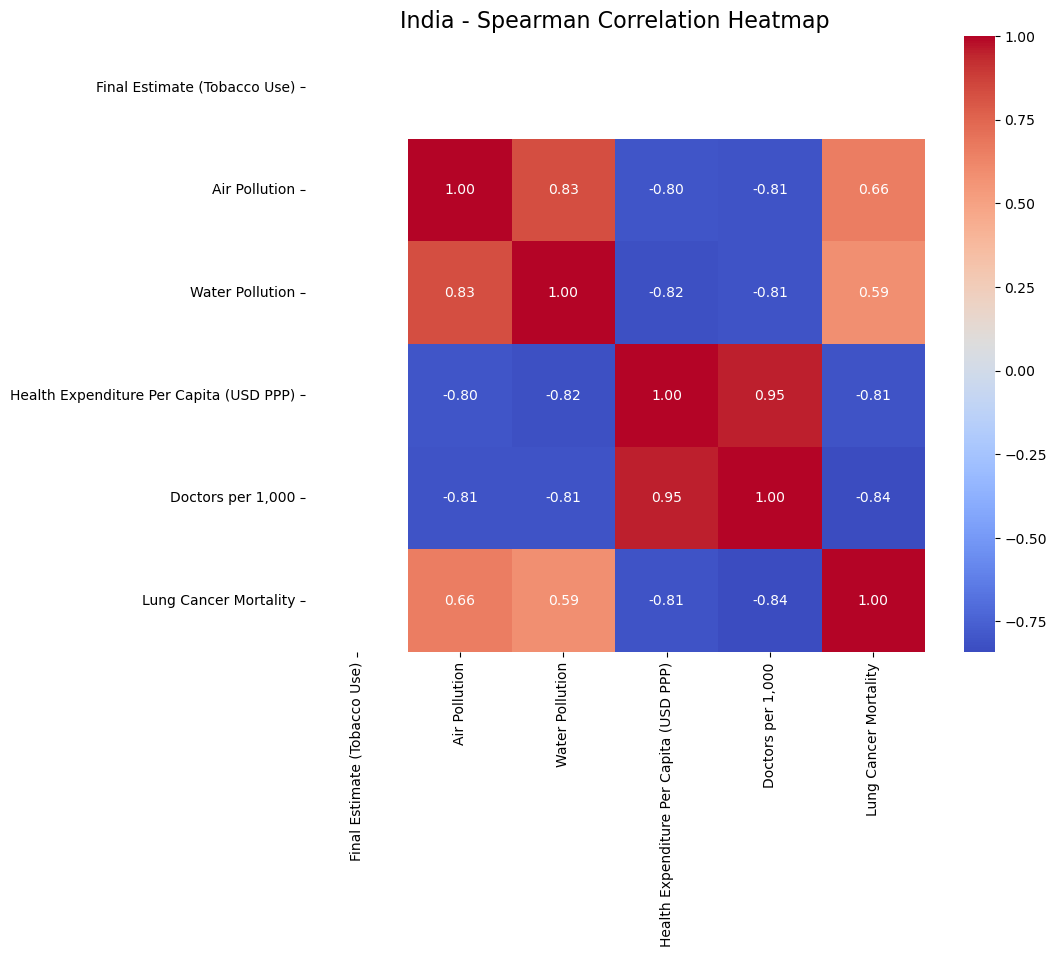

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr, linregress

# Load the updated dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India
canada = df[df['Country'] == 'Canada']

# Select relevant columns
cols_of_interest = [
    'Final Estimate (Tobacco Use)', 
    'Air Pollution', 
    'Water Pollution', 
    'Health Expenditure Per Capita (USD PPP)', 
    'Doctors per 1,000', 
    'Lung Cancer Mortality'
]

# Calculate Spearman Correlation Matrix
corr_matrix = canada[cols_of_interest].corr(method='spearman')

# Display correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('India - Spearman Correlation Heatmap', fontsize=16)
plt.show()

In [50]:
import pandas as pd
from scipy.stats import spearmanr

# Define a function to get Spearman correlation and p-value
def get_correlation(x, y):
    rho, pval = spearmanr(canada[x], canada[y], nan_policy='omit')
    return rho, pval

# List of variables we want to test
variables = [
    ('Tobacco Use', 'Tobacco Use'),
    ('Air Pollution', 'Air Pollution'),
    ('Water Pollution', 'Water Pollution'),
    ('Health Expenditure Per Capita (USD PPP)', 'Health Expenditure'),
    ('Doctors per 1,000', 'Doctors per 1,000')
]

# Create empty list to collect results
results = []

# Loop over variables
for var, name in variables:
    rho, pval = get_correlation(var, 'Lung Cancer Mortality')
    decision = "Reject H0 (Significant)" if pval < 0.05 else "Fail to Reject H0 (Not Significant)"
    results.append({
        'Variable': name,
        'Spearman ρ': round(rho, 3),
        'p-value': round(pval, 4),
        'Hypothesis Decision': decision
    })

# Create a DataFrame from results
summary_table = pd.DataFrame(results)

# Show the table
summary_table


,Variable,Spearman ρ,p-value,Hypothesis Decision
0,Tobacco Use,0.835,0.0000,Reject H0 (Significant)
1,Air Pollution,0.659,0.0001,Reject H0 (Significant)
2,Water Pollution,0.587,0.0005,Reject H0 (Significant)
3,Health Expenditure,-0.811,0.0000,Reject H0 (Significant)
4,"Doctors per 1,000",-0.841,0.0000,Reject H0 (Significant)


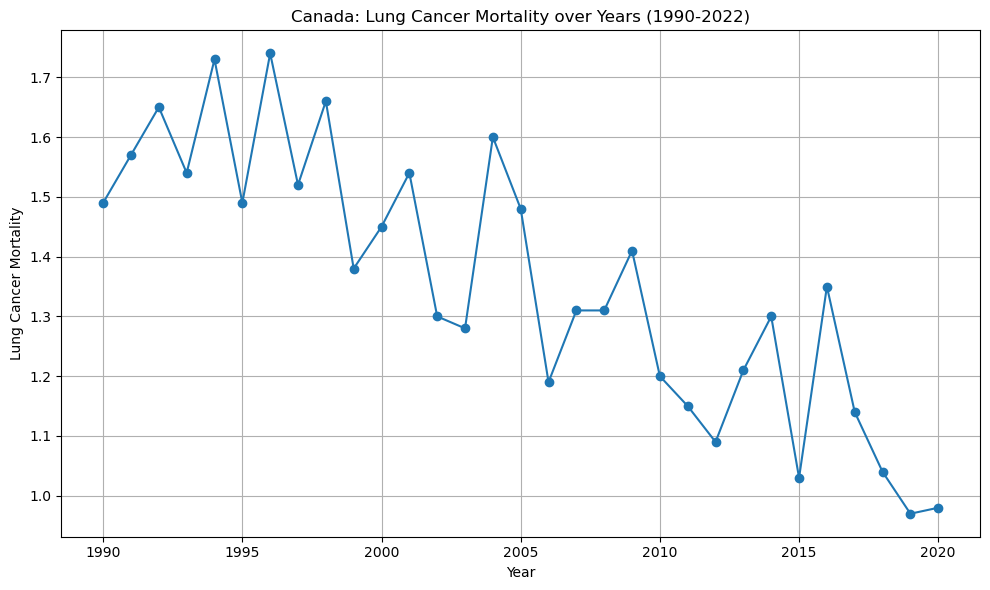

In [43]:
plt.figure(figsize=(10,6))
plt.plot(canada['Year'], canada['Lung Cancer Mortality'], marker='o', linestyle='-')
plt.title('Canada: Lung Cancer Mortality over Years (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Mortality')
plt.grid(True)
plt.tight_layout()
plt.show()


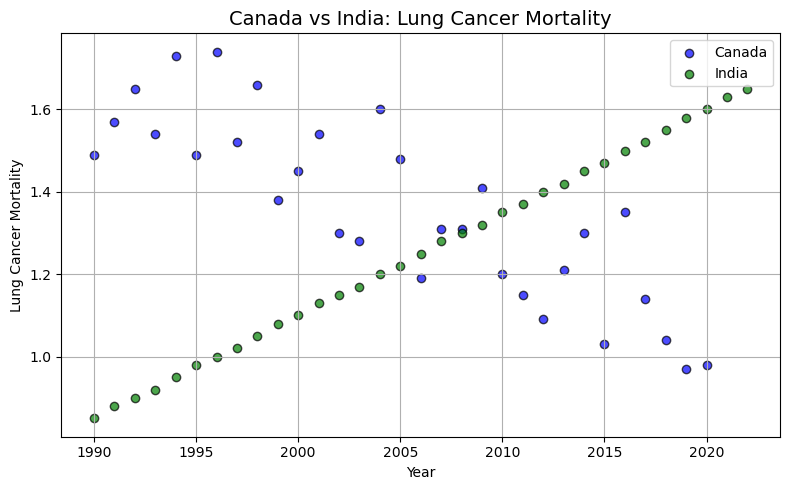

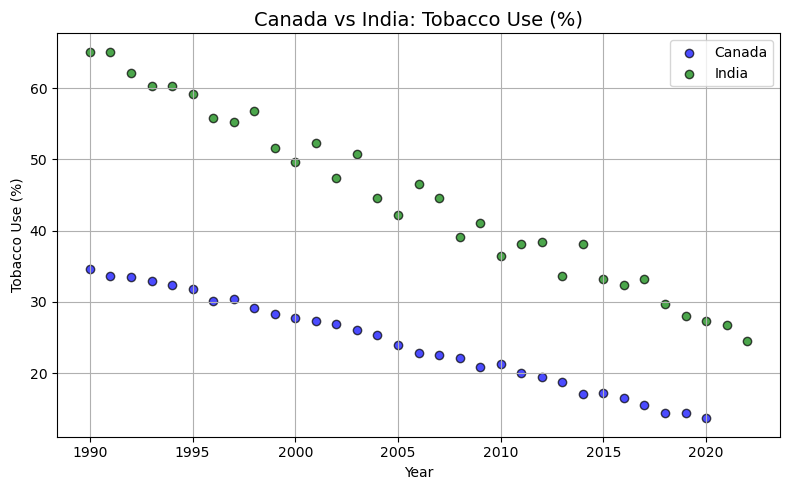

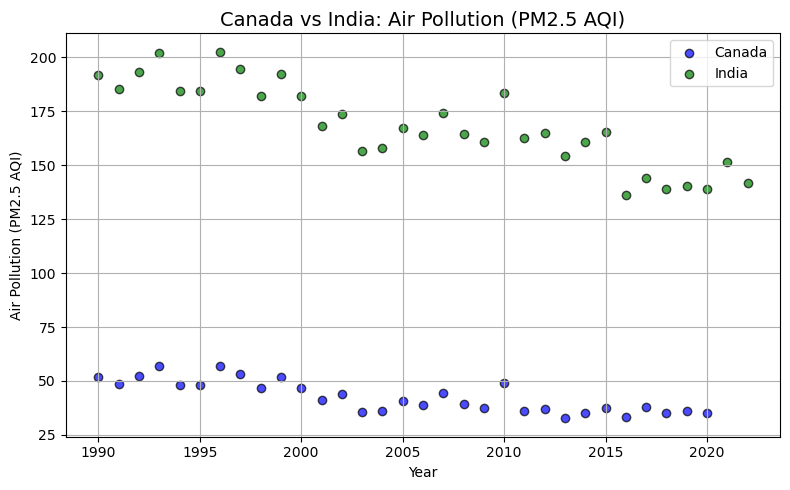

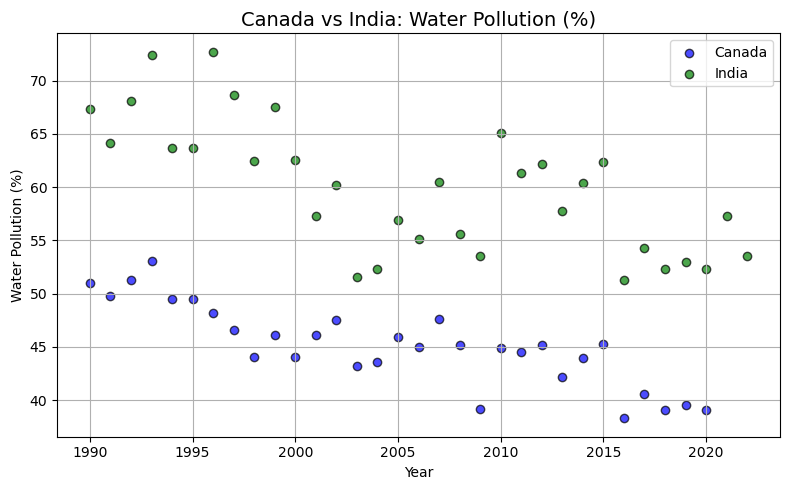

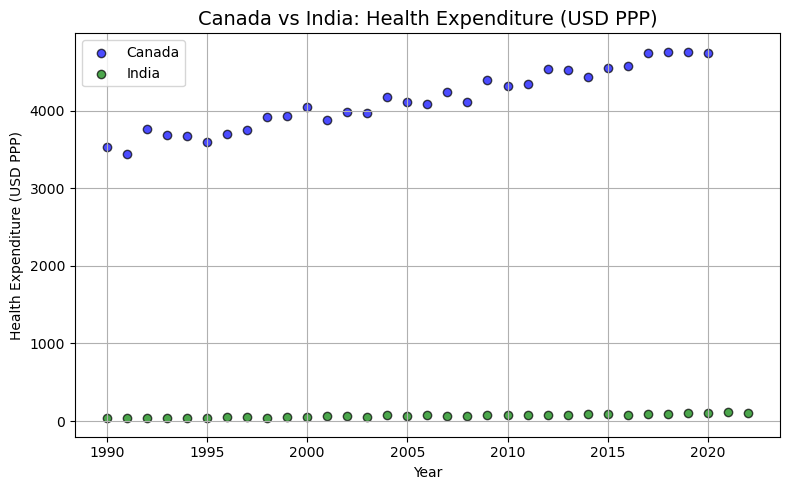

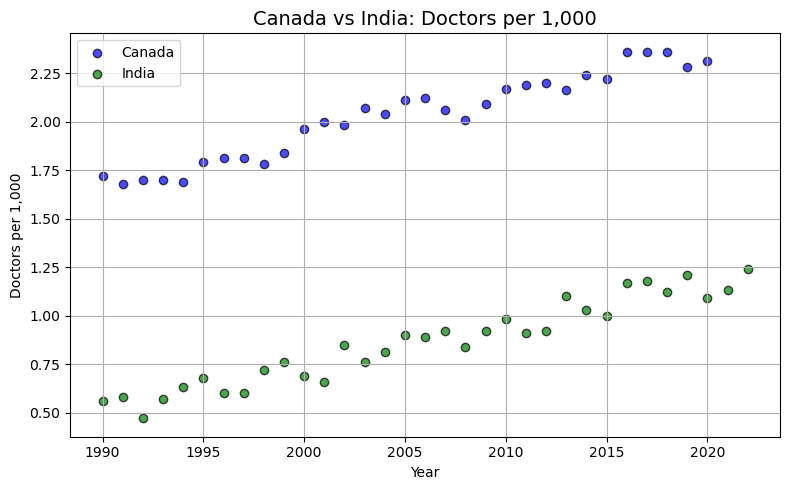

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your combined data
df = pd.read_csv("final_clean_combined_dataset.csv")

# 2. Split into two DataFrames
canada = df[df['Country']=="Canada"]
india  = df[df['Country']=="India"]

# 3. Define for each “logical” variable the actual column names in each country
column_map = {
    'Tobacco Use (%)': (
        'Tobacco Use',                 # Canada’s column
        'Final Estimate (Tobacco Use)' # India’s column
    ),
    'Air Pollution (PM2.5 AQI)': (
        'Air Pollution',               # same for both
        'Air Pollution'
    ),
    'Water Pollution (%)': (
        'Water Pollution',
        'Water Pollution'
    ),
    'Health Expenditure (USD PPP)': (
        'Health Expenditure Per Capita (USD PPP)',
        'Health Expenditure Per Capita (USD PPP)'
    ),
    'Doctors per 1,000': (
        'Doctors per 1,000',
        'Doctors per 1,000'
    ),
    'Lung Cancer Mortality': (
        'Lung Cancer Mortality',
        'Lung Cancer Mortality'
    )
}

# 4. A helper to plot any pair, taking care of the two column names
def scatter_country_comparison(variable_label):
    col_can, col_ind = column_map[variable_label]
    plt.figure(figsize=(8,5))
    plt.scatter(canada['Year'], canada[col_can],
                label='Canada', color='blue', alpha=0.7, edgecolors='black')
    plt.scatter(india['Year'], india[col_ind],
                label='India',  color='green',alpha=0.7, edgecolors='black')
    plt.title(f"Canada vs India: {variable_label}", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel(variable_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Now draw each comparison
scatter_country_comparison('Lung Cancer Mortality')
scatter_country_comparison('Tobacco Use (%)')
scatter_country_comparison('Air Pollution (PM2.5 AQI)')
scatter_country_comparison('Water Pollution (%)')
scatter_country_comparison('Health Expenditure (USD PPP)')
scatter_country_comparison('Doctors per 1,000')


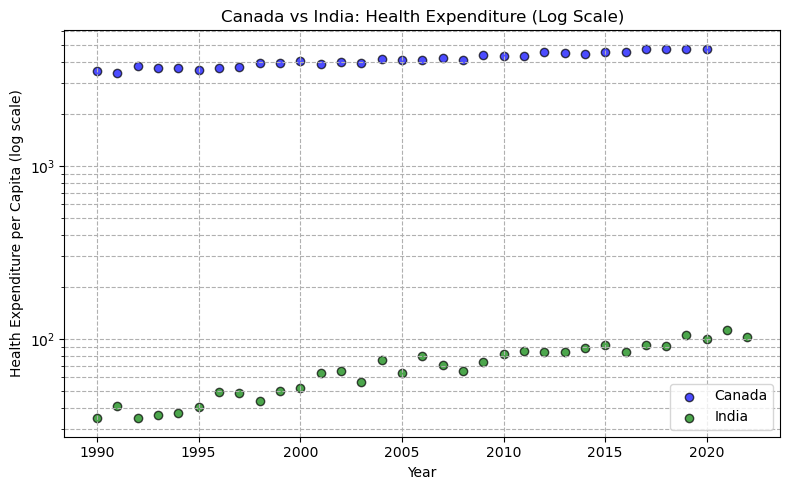

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(canada['Year'], canada['Health Expenditure Per Capita (USD PPP)'],
            color='blue', alpha=0.7, edgecolors='black', label='Canada')
plt.scatter(india['Year'], india['Health Expenditure Per Capita (USD PPP)'],
            color='green', alpha=0.7, edgecolors='black', label='India')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Health Expenditure per Capita (log scale)')
plt.title('Canada vs India: Health Expenditure (Log Scale)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()


India PM2.5 Mean: 168.66669350895899
Canada PM2.5 Mean: 42.736646145192864


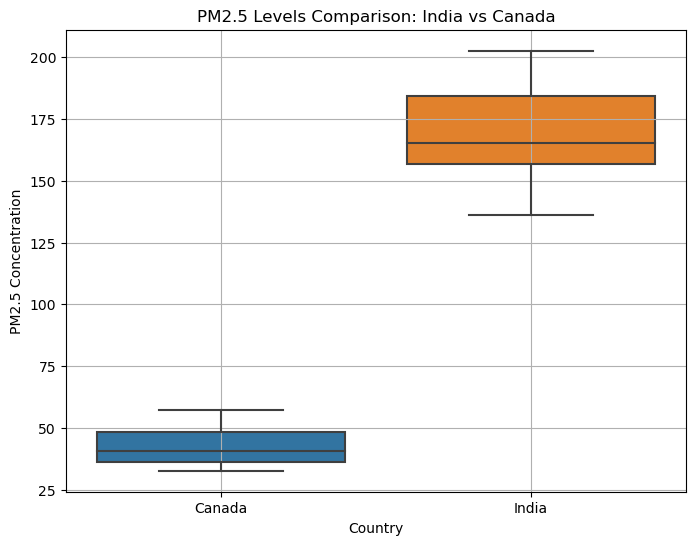


T-test Results:
T-statistic: 34.783227715563314
P-value: 2.352888101332243e-32
Result: Reject the null hypothesis. PM2.5 levels in India and Canada are significantly different.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India and Canada data
india = df[df['Country'] == 'India']
canada = df[df['Country'] == 'Canada']

# --- Descriptive Statistics ---
print("India PM2.5 Mean:", india['Air Pollution'].mean())
print("Canada PM2.5 Mean:", canada['Air Pollution'].mean())

# --- Boxplot: PM2.5 Comparison ---
plt.figure(figsize=(8,6))
sns.boxplot(x='Country', y='Air Pollution', data=df[df['Country'].isin(['India', 'Canada'])])
plt.title('PM2.5 Levels Comparison: India vs Canada')
plt.xlabel('Country')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)

plt.show()
# --- T-test: Comparing India and Canada PM2.5 Levels ---
t_stat, p_value = stats.ttest_ind(india['Air Pollution'], canada['Air Pollution'], equal_var=False)

print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# --- Hypothesis Test Result ---
alpha = 0.05  # significance level

if p_value < alpha:
    print("Result: Reject the null hypothesis. PM2.5 levels in India and Canada are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in PM2.5 levels between India and Canada.")




India Lung Cancer Mortality Mean: 1.2496969696969698
Canada Lung Cancer Mortality Mean: 1.3580645161290321


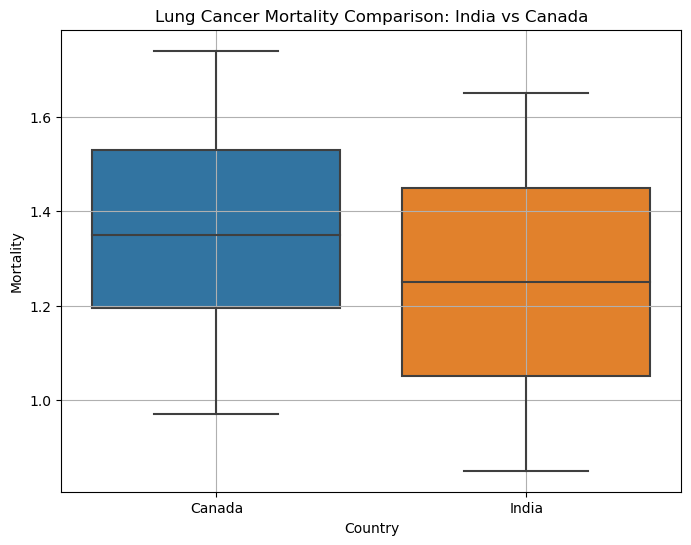


T-test Results:
T-statistic: -1.8713316079118483
P-value: 0.06602134429088663
Result: Fail to reject the null hypothesis. No significant difference in Lung Cancer Mortality levels between India and Canada.


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India and Canada data
india = df[df['Country'] == 'India']
canada = df[df['Country'] == 'Canada']

# --- Descriptive Statistics ---
print("India Lung Cancer Mortality Mean:", india['Lung Cancer Mortality'].mean())
print("Canada Lung Cancer Mortality Mean:", canada['Lung Cancer Mortality'].mean())

# --- Boxplot: PM2.5 Comparison ---
plt.figure(figsize=(8,6))
sns.boxplot(x='Country', y='Lung Cancer Mortality', data=df[df['Country'].isin(['India', 'Canada'])])
plt.title('Lung Cancer Mortality Comparison: India vs Canada')
plt.xlabel('Country')
plt.ylabel('Mortality')
plt.grid(True)

plt.show()
# --- T-test: Comparing India and Canada PM2.5 Levels ---
t_stat, p_value = stats.ttest_ind(india['Lung Cancer Mortality'], canada['Lung Cancer Mortality'], equal_var=False)

print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# --- Hypothesis Test Result ---
alpha = 0.05  # significance level

if p_value < alpha:
    print("Result: Reject the null hypothesis. Lung Cancer Mortality levels in India and Canada are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in Lung Cancer Mortality levels between India and Canada.")




India Health Expenditure Per Capita (USD PPP) 69.07969696969697
Canada Health Expenditure Per Capita (USD PPP): 4137.8751612903225


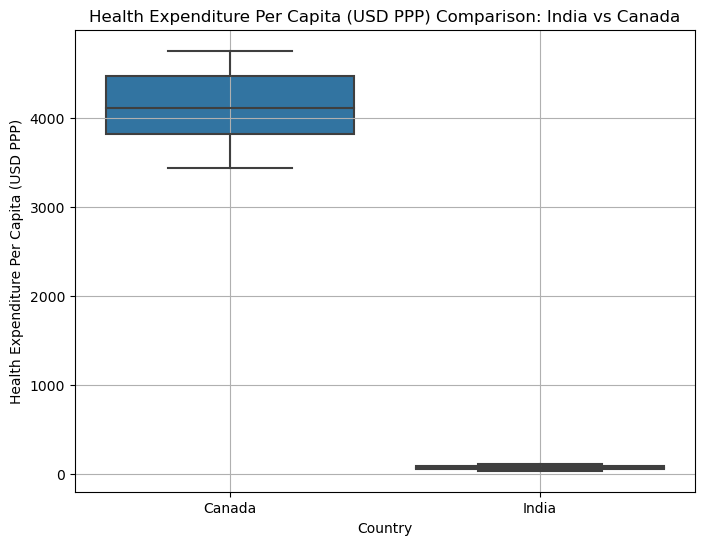


T-test Results:
T-statistic: -57.41459263384998
P-value: 2.156445105185347e-32
Result: Reject the null hypothesis. Health Expenditure Per Capita (USD PPP) levels in India and Canada are significantly different.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India and Canada data
india = df[df['Country'] == 'India']
canada = df[df['Country'] == 'Canada']

# --- Descriptive Statistics ---
print("India Health Expenditure Per Capita (USD PPP)", india['Health Expenditure Per Capita (USD PPP)'].mean())
print("Canada Health Expenditure Per Capita (USD PPP):", canada['Health Expenditure Per Capita (USD PPP)'].mean())

# --- Boxplot: PM2.5 Comparison ---
plt.figure(figsize=(8,6))
sns.boxplot(x='Country', y='Health Expenditure Per Capita (USD PPP)', data=df[df['Country'].isin(['India', 'Canada'])])
plt.title('Health Expenditure Per Capita (USD PPP) Comparison: India vs Canada')
plt.xlabel('Country')
plt.ylabel('Health Expenditure Per Capita (USD PPP)')
plt.grid(True)

plt.show()
# --- T-test: Comparing India and Canada PM2.5 Levels ---
t_stat, p_value = stats.ttest_ind(india['Health Expenditure Per Capita (USD PPP)'], canada['Health Expenditure Per Capita (USD PPP)'], equal_var=False)

print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# --- Hypothesis Test Result ---
alpha = 0.05  # significance level

if p_value < alpha:
    print("Result: Reject the null hypothesis. Health Expenditure Per Capita (USD PPP) levels in India and Canada are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in Health Expenditure Per Capita (USD PPP) levels between India and Canada.")




India Water Pollution Mean: 59.970287682795714
Canada Water Pollution Mean: 45.1174980751609


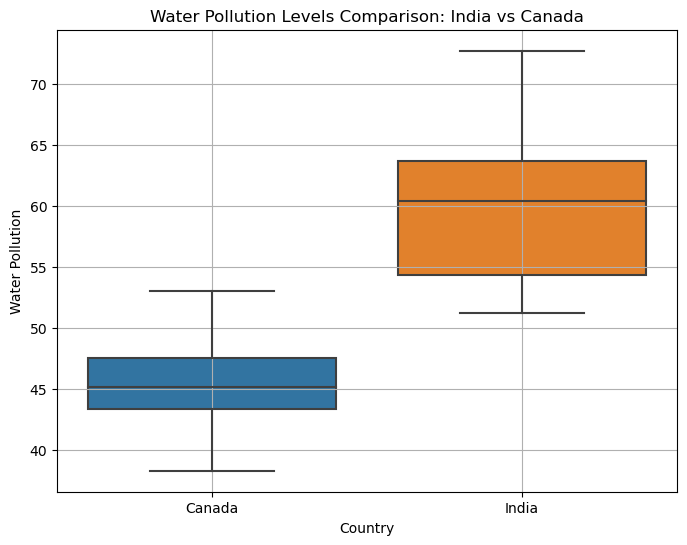


T-test Results:
T-statistic: 11.60051334193618
P-value: 2.681344669739041e-16
Result: Reject the null hypothesis. Water Pollution levels in India and Canada are significantly different.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("final_clean_combined_dataset.csv")

# Filter India and Canada data
india = df[df['Country'] == 'India']
canada = df[df['Country'] == 'Canada']

# --- Descriptive Statistics ---
print("India Water Pollution Mean:", india['Water Pollution'].mean())
print("Canada Water Pollution Mean:", canada['Water Pollution'].mean())

# --- Boxplot: PM2.5 Comparison ---
plt.figure(figsize=(8,6))
sns.boxplot(x='Country', y='Water Pollution', data=df[df['Country'].isin(['India', 'Canada'])])
plt.title('Water Pollution Levels Comparison: India vs Canada')
plt.xlabel('Country')
plt.ylabel('Water Pollution')
plt.grid(True)

plt.show()
# --- T-test: Comparing India and Canada PM2.5 Levels ---
t_stat, p_value = stats.ttest_ind(india['Water Pollution'], canada['Water Pollution'], equal_var=False)

print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# --- Hypothesis Test Result ---
alpha = 0.05  # significance level

if p_value < alpha:
    print("Result: Reject the null hypothesis. Water Pollution levels in India and Canada are significantly different.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in Water Pollution levels between India and Canada.")


